In [1]:
import random

In [2]:
class Perceptron:
    
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold
    
    def activate(self, inputs):
        """
        Activeert de Perceptron met de gegeven inputs.
        
        Args:
            inputs (list): Een lijst met inputwaarden.
        
        Returns:
            int: De geactiveerde uitvoer van de Perceptron (0 of 1).
        """
        weighted_sum = sum(weight * input_value for weight, input_value in zip(self.weights, inputs))
        weighted_sum -= self.threshold
        return int(weighted_sum >= 0)
    
    def loss(self, inputs, targets):
        """
        Berekent de loss van de Perceptron voor de gegeven inputs en targets.
        """
        total_error = 0
        n = len(inputs)

        for i in range(n):
            predicted_output = self.activate(inputs[i])
            error = (targets[i] - predicted_output) ** 2
            total_error += error

        mse=  total_error / n
        return mse

    def update(self, inputs, targets):
        total_error = 1  
        iterations = 0
        while total_error > 0.01:  
            total_error = 0
            for i in range(len(inputs)):
                predicted_output = self.activate(inputs[i])
                error = targets[i] - predicted_output
                for j in range(len(self.weights)):
                    self.weights[j] += error * inputs[i][j]
                self.threshold -= error
                total_error += error ** 2
            total_error /= len(inputs)  
            iterations += 1
            if iterations > 100000:  
                print("Max aantal iteraties overschreden.")
                break

            return total_error

    def __str__(self):
        return f"weights - {self.weights}      -----       threshold - {self.threshold}"



class PerceptronLayer:
    def __init__(self, perceptrons):
        self.perceptrons = perceptrons
    
    def activate(self, inputs):
        """
        Activeert de perceptrons in deze laag met de gegeven inputs en retourneert de geactiveerde outputs.

        Parameters:
        inputs (list): Een lijst van inputwaarden.

        Returns:
        list: Een lijst van geactiveerde outputwaarden.
        """
        activated_outputs = []
        for perceptron in self.perceptrons:
            activated_outputs.append(perceptron.activate(inputs))
        return activated_outputs

    def __str__(self):
        return f"perceptrons - {self.perceptrons}"


class PerceptronNetwork:
    def __init__(self, layers):
        self.layers = layers
    
    def feed_forward(self, inputs):
        """
        Voert een voorwaartse propagatie uit in het netwerk.
        
        Args:
            inputs (list): Een lijst van invoerwaarden voor het netwerk.
        
        Returns:
            output: De uitvoerwaarde van het netwerk na de voorwaartse propagatie.
        """
        output = inputs
        for layer in self.layers:
            output = layer.activate(output)
        return output
    
    def __str__(self):
        return f"layers - {self.layers}"


1. Test voor INVERT poort

In [3]:
#klopt 
invert_perceptron = Perceptron(weights=[-1], threshold=0)
print(invert_perceptron.activate([0]))
print(invert_perceptron.activate([1]))

1
0


2. Test voor OR poort

In [4]:
#klopt
or_perceptron = Perceptron(weights=[1, 1], threshold=1)
print(or_perceptron.activate([0, 0]))
print(or_perceptron.activate([0, 1]))
print(or_perceptron.activate([1, 0]))
print(or_perceptron.activate([1, 1]))


0
1
1
1


3. Test voor AND poort

In [5]:
#klopt 
and_perceptron = Perceptron(weights=[1, 1], threshold=2)
print(and_perceptron.activate([0, 0]))
print(and_perceptron.activate([0, 1]))
print(and_perceptron.activate([1, 0]))
print(and_perceptron.activate([1, 1]))


0
0
0
1


4. Test voor NOR poort

In [6]:
#Klopt
nor_perceptron = Perceptron(weights=[-1, -1, -1], threshold=0)
print(nor_perceptron.activate([0, 0, 0]))
print(nor_perceptron.activate([0, 0, 1]))
print(nor_perceptron.activate([0, 1, 0]))
print(nor_perceptron.activate([1, 0, 0]))
print(nor_perceptron.activate([1, 1, 1]))

1
0
0
0
0


5. Uitgebreider beslis systeem

In [7]:
#klopt
decision_perceptron = Perceptron(weights=[1, -1, 1], threshold=1)
print(decision_perceptron.activate([0, 0, 0]))
print(decision_perceptron.activate([0, 1, 0]))
print(decision_perceptron.activate([1, 0, 1]))
print(decision_perceptron.activate([1, 1, 1]))


0
0
1
1


6. Test XOR poort

In [8]:
#klopt volgensmij niet, alleen ik kom er niet uit waroom niet...
xor_network = PerceptronNetwork([
    PerceptronLayer([
        Perceptron(weights=[1, 1], threshold=1), #OR-poort
        Perceptron(weights=[-2, -2], threshold=-3) #NAND-poort
    ]),
    PerceptronLayer([
        Perceptron(weights=[1, 1], threshold=2) #AND poort
    ])
])

print(xor_network.feed_forward([0, 0]))
print(xor_network.feed_forward([0, 1]))
print(xor_network.feed_forward([1, 0]))
print(xor_network.feed_forward([1, 1]))


[0]
[1]
[1]
[0]


7. Test voor Half ladder 

In [9]:
half_adder_network = PerceptronNetwork([
    PerceptronLayer([
        Perceptron(weights=[-2, -2], threshold=-2), 
        Perceptron(weights=[1, 1], threshold=1),   
        Perceptron(weights=[1, 1], threshold=2)    
    ]),
    PerceptronLayer([
        Perceptron(weights=[1, 1, -2], threshold=2),  
        Perceptron(weights=[-1, 1, 1], threshold=2)  
    ])
])
print(half_adder_network.feed_forward([0, 0]))
print(half_adder_network.feed_forward([0, 1]))
print(half_adder_network.feed_forward([1, 0]))
print(half_adder_network.feed_forward([1, 1]))


[0, 0]
[1, 0]
[1, 0]
[0, 1]


p2


1. Perceptron trainen ot het een AND-Functie heeft geleerd

In [10]:

random.seed(2005)
weights = [random.uniform(-1, 1) for _ in range(2)]
threshold = random.uniform(-1, 1)
perceptron_and = Perceptron(weights, threshold)

inputs_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
targets_and = [0, 0, 0, 1]


mse_and = perceptron_and.update(inputs_and, targets_and)
print("MSE:", mse_and)
print("parameters voor AND-functie:", perceptron_and.weights, perceptron_and.threshold)


MSE: 0.0
parameters voor AND-functie: [1.9007419945832429, 1.1528039051099297] 2.4189231166920333


2. Perceptron trainen tot het een XOR-Functie heeft geleerd


Een enkele perceptron kan de XOR-functie niet modelleren vanwege de niet-lineariteit van XOR. Een enkele perceptron kan alleen lineaire beslissingsgrenzen modelleren, In tegenstelling tot een AND of OR functie is XOR niet lineair scheidbaar. Om een XOR te scheiden heb je minimaal twee lineaire beslissingsgrenzen nodig. 

3. Trainen om de Iris-dataset te classificeren (Setosa en Versicolor)

In [11]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

parameters voor Setosa en Versicolor:
weights - [-0.43173422548469986, -3.7591711205275757, 5.798175768318847, 2.5789052857398453]      -----       threshold - 1.1973273048079636


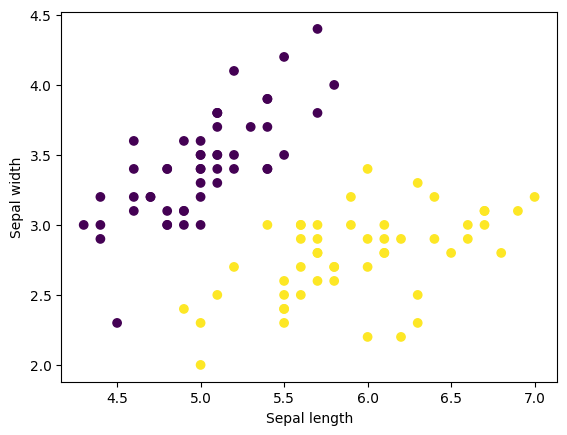

In [12]:
# mijn prachtige studentnummer random seed
random.seed(1838178)

# laad de dataset in
iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

weights = []
for x in range(4):
    weights.append(random.uniform(0, 1))

threshold = random.uniform(0, 1)

perceptron = Perceptron(weights, threshold)
mse = perceptron.update(X, y)

print("parameters voor Setosa en Versicolor:")
print(perceptron)

#plot de dataset (laat mooi zien dat de data valt te scheiden door een lineaire lijn)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


4. Trainen om de Iris-dataset te classificeren (Versicolor en Virginica)

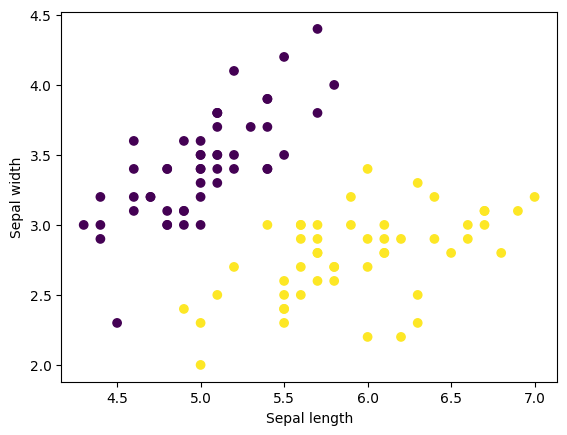

In [13]:
#plot de dataset (laat mooi zien dat de data niet valt te scheiden door een lineaire lijn)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()


Kijkend naar de grafiek is duidelijk te zien dat er geen enkele mogelijkheid is om de data met 1 lijn te scheiden (ik krijg het in ieder geval niet voor mekaar). Dit maakt het dus onmogelijk om de percetron hierop te trainen.